In [1]:
# Imports

import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt

In [32]:
# Creating web driver object
driver = webdriver.Chrome()
page_url = "https://harrypotter.fandom.com/wiki/Category:Character_indexes"
driver.get(page_url)

# Extracting data from web pages
# Books
from selenium.webdriver.common.by import By
books = driver.find_elements(By.CLASS_NAME, 'category-page__member-link') 

## Check
#print(books[6].text) # Books got extracted
#print(books[0].get_attribute('href')) # Links for books
#driver.get(books[0].get_attribute('href')) # Access the link
#characters = driver.find_elements(By.CLASS_NAME, 'article-table') 
#print(characters[1].text)

time.sleep(3)
# Creating a dictionary of books and URLs
books_url_dict = []
for category in books:
    book_url = category.get_attribute('href')
    book_name = category.text.replace(' (character index)','')
    books_url_dict.append({'book_name':book_name, 'url':book_url})
#print(books_url_dict)

# Extract characters
char_list_1 = []
char_list_2 = []
for i in range(0,len(books_url_dict)):
    if i in (0,5): # Part 1
        # for book in books_url_dict:
        #book+=books_url_dict[i]
        # go to book page
        driver.get(books_url_dict[i]['url'])

        char_elems = driver.find_elements(By.CLASS_NAME, 'article-table')
        for elem in char_elems:
            char_list_1.append({'book':books_url_dict[i]['book_name'],'character':elem.text})
        #print(char_list_1[0])
    if i in (1,2,3,4,6): # Part 2
        book = books_url_dict[i]
        # go to book page
        driver.get(book['url'])
        char_elems = driver.find_elements(By.XPATH, '//*[@id="mw-content-text"]/div/ul')
        for elem in char_elems[:-2]:
            char_list_2.append({'book':book['book_name'],'character':elem.text})
        #print(char_list_2[0])

# # Extract characters (Part 1)
# char_list_1 = []
# for book in books_url_dict:
#     # go to book page
#     driver.get(book['url'])
    
#     char_elems = driver.find_elements(By.CLASS_NAME, 'article-table')
#     for elem in char_elems:
#         char_list_1.append({'book':book['book_name'],'character':elem.text})
# print(char_list_1[0])

# # Extract characters (Part 2)
# time.sleep(3)
# char_list_2 = []
# for book in books_url_dict:
#     # go to book page
#     driver.get(book['url'])
    
#     char_elems = driver.find_elements(By.XPATH, '//*[@id="mw-content-text"]/div/ul')
#     for elem in char_elems:
#         char_list_2.append({'book':book['book_name'],'character':elem.text})
# print(char_list_2[0])

In [93]:
# Converting the scrapped data into a DataFrame and Preprocessing
# Converting names to lists
for i in char_list_1:
    i['character'] = i['character'].split('\n')

for i in char_list_2:
    i['character'] = i['character'].split('\n')

# Creating Dataframes
# char_list_1
df_1 = pd.DataFrame(char_list_1[0])
for i in range(1,len(char_list_1)):
    new = pd.DataFrame(char_list_1[i])
    df_1 = df_1.append(new)
    
# char_list_2
df_2 = pd.DataFrame(char_list_2[0])
for i in range(1,len(char_list_2)):
    new = pd.DataFrame(char_list_2[i])
    df_2 = df_2.append(new)
    
df = df_1.append(df_2)
df.reset_index(drop=True, inplace=True)

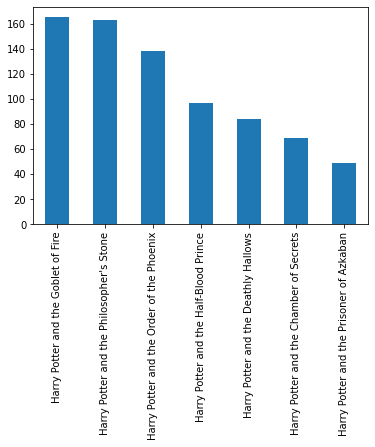

In [85]:
# Visualizing character counts in each book

df['book'].value_counts().plot(kind='bar')
plt.show()